In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import os
os.chdir('gdrive/My Drive/fruit/') 

FileNotFoundError: ignored

In [0]:
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
training_data = []
DATADIR = "dataset/train"
IMG_SIZE = 50

CATEGORIES = ["freshbanana","rottenbanana"]
def create_training_data():
    for category in CATEGORIES: 

        path = os.path.join(DATADIR,category)  
        class_num = CATEGORIES.index(category)  

        for img in tqdm(os.listdir(path)):  
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) 
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
           
create_training_data()

print(len(training_data))

100%|██████████| 2224/2224 [00:16<00:00, 132.62it/s]

3805


In [0]:
print(len(training_data))

3805


In [0]:
import random

random.shuffle(training_data)

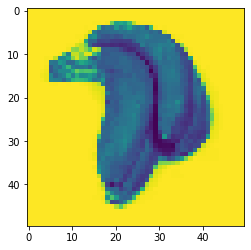

1


In [0]:
plt.imshow(training_data[50][0])
plt.show()
print(training_data[50][1])

In [0]:
X = []
y = []
import numpy as np
for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[255]
   [255]
   [255]
   ...
   [254]
   [254]
   [254]]

  [[255]
   [255]
   [255]
   ...
   [254]
   [254]
   [254]]

  [[255]
   [255]
   [255]
   ...
   [254]
   [254]
   [254]]

  ...

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]]]


In [0]:
import pickle

pickle_out = open("XX.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("yy.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [0]:
pickle_in = open("XX.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("yy.pickle","rb")
y = pickle.load(pickle_in)
print(len(X)+len(y))

7610
